In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import os

In [2]:
# Read salary data
file_path = Path("All_data_cleaned.csv")
crime = pd.read_csv(file_path)

# Display sample data
crime.head()

,Year,City,Percent Population 25 years and over - Less than 9th grade,Percent Population 25 years and over - 9th to12th (No Diploma),Percent Population 25 years and over - High School Graduate (and equivalent),"Percent Population 25 years and over - Some college, no degree",Percent Population 25 years and over - Associate's degree,Percent Population 25 years and over - Bachelor's degree,Percent Population 25 years and over - Graduate or Prefessional Degree,Total population,...,Percent 75 to 84 years,Percent 85 years and over,Violent Crimes Sum,Unemployment Rate,Income,House price mean,% All Families,Crime_Rate_per_100k,Percent Home Occupied,Percent Renter Occupied
0,2010,Alameda,5.5,4.5,17.0,19.9,5.8,31.0,16.3,73981.0,...,3.8,2.1,173.0,11.1,28011.0,605675.9,9.6,233.843825,46.920853,53.079147
1,2010,Alhambra,10.1,7.4,21.7,19.6,8.9,21.7,10.5,83202.0,...,4.2,3.0,185.0,9.2,28100.0,441616.7,10.7,222.350424,38.053381,61.946619
2,2010,Anaheim,15.5,10.7,24.3,18.8,6.7,18.0,6.0,337259.0,...,3.0,1.2,1161.0,14.4,100404.0,371899.4,12.4,344.245817,48.388510,51.611490
3,2010,Antioch,7.7,7.3,26.9,31.7,8.8,13.6,4.1,102745.0,...,2.4,1.1,864.0,15.3,30970.0,181427.3,8.0,840.916833,62.767194,37.232806
4,2010,Apple Valley,1.5,7.7,33.4,26.9,11.0,10.5,9.0,69387.0,...,6.4,2.2,188.0,12.3,23900.0,138720.2,10.4,270.944125,70.690377,29.309623


In [3]:
crime.dtypes

Year                                                                              int64
City                                                                             object
Percent Population 25 years and over - Less than 9th grade                      float64
Percent Population 25 years and over - 9th to12th (No Diploma)                  float64
Percent Population 25 years and over - High School Graduate (and equivalent)    float64
Percent Population 25 years and over - Some college, no degree                  float64
Percent Population 25 years and over - Associate's degree                       float64
Percent Population 25 years and over - Bachelor's degree                        float64
Percent Population 25 years and over - Graduate or Prefessional Degree          float64
Total population                                                                float64
Percent Under 5 years                                                           float64
Percent 5 to 9 years            

In [4]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [5]:
def plot_linear_regression(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
    
    # Print regression results
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {rvalue**2}")
    print(f"P-value: {pvalue}")
    print(f"Standard Error: {stderr}")
    
    # Show plot
    plt.legend()
    
    output_path = os.path.join('plots', f'{x_label}_v_{y_label}.png')
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()


Slope: -0.0203013948907081
Intercept: 61.74651048392113
R-squared: 0.1336225109276191
P-value: 1.7426817024552706e-36
Standard Error: 0.001551594227195863


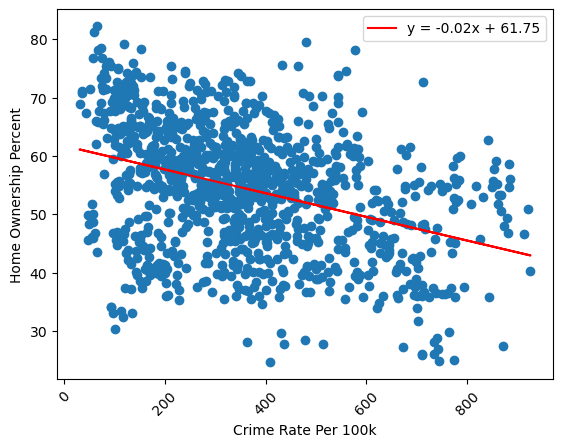

In [6]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent Home Occupied')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent Home Occupied']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Home Ownership Percent")

Slope: 0.0203013948907081
Intercept: 38.25348951607887
R-squared: 0.1336225109276191
P-value: 1.7426817024552706e-36
Standard Error: 0.001551594227195863


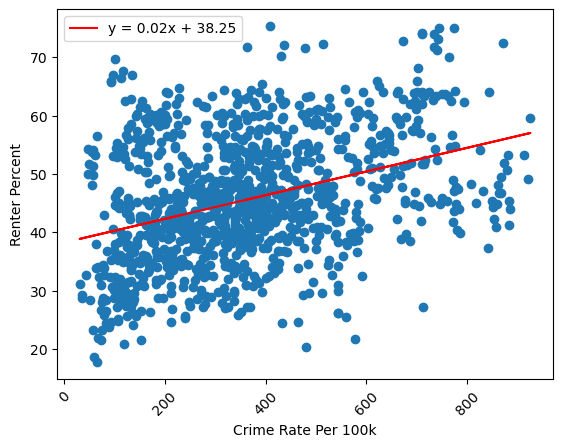

In [7]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent Renter Occupied')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent Renter Occupied']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Renter Percent")

Slope: 0.01493814026977433
Intercept: 4.993976172982768
R-squared: 0.28536756794097284
P-value: 1.785042451033931e-82
Standard Error: 0.0007121062374583362


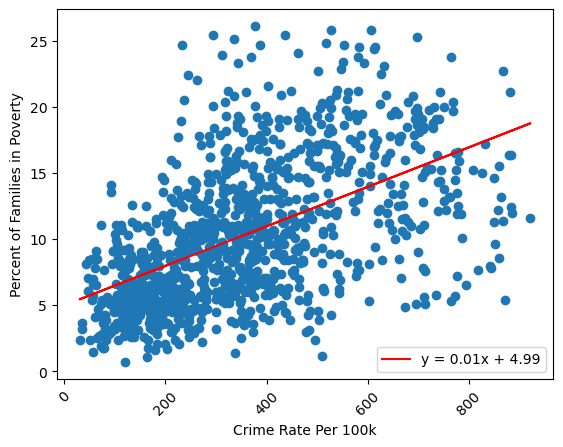

In [8]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, '% All Families')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['% All Families']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Families in Poverty")

Slope: 0.01493814026977433
Intercept: 4.993976172982768
R-squared: 0.28536756794097284
P-value: 1.785042451033931e-82
Standard Error: 0.0007121062374583362


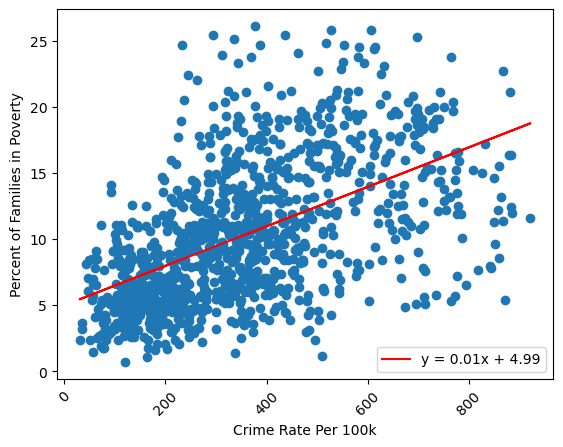

In [9]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, '% All Families')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['% All Families']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Families in Poverty")

Slope: -420.7764109909021
Intercept: 571533.3052658092
R-squared: 0.18932758469531846
P-value: 8.719671465240687e-50
Standard Error: 26.88310271581771


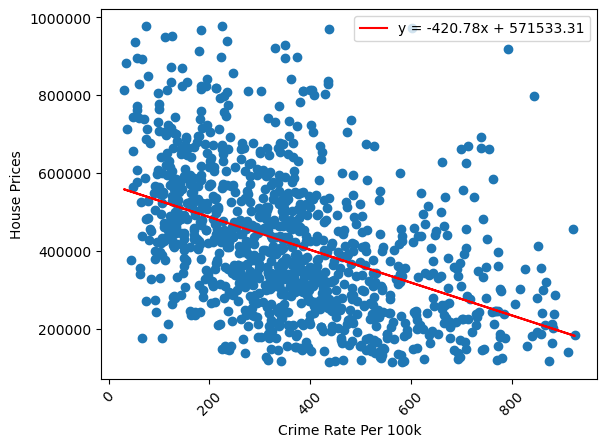

In [10]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'House price mean')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['House price mean']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","House Prices")

Slope: -6.313879152290316
Intercept: 39311.02144928615
R-squared: 0.006735968047291309
P-value: 0.009102054673081112
Standard Error: 2.4160942696964174


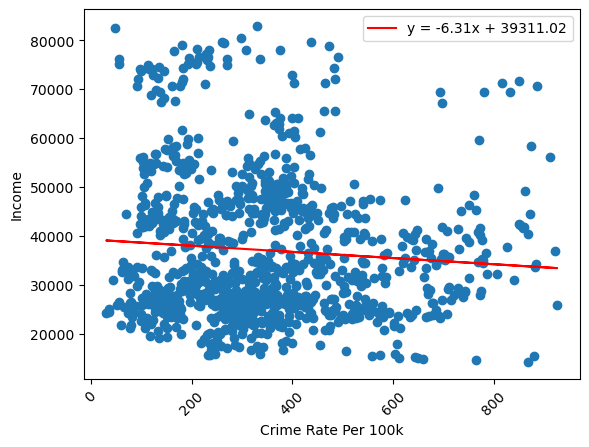

In [11]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Income')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Income']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Income")

Slope: 0.006629006322056644
Intercept: 5.934187617881691
R-squared: 0.10666213817283345
P-value: 8.856122618706943e-29
Standard Error: 0.000578698444095134


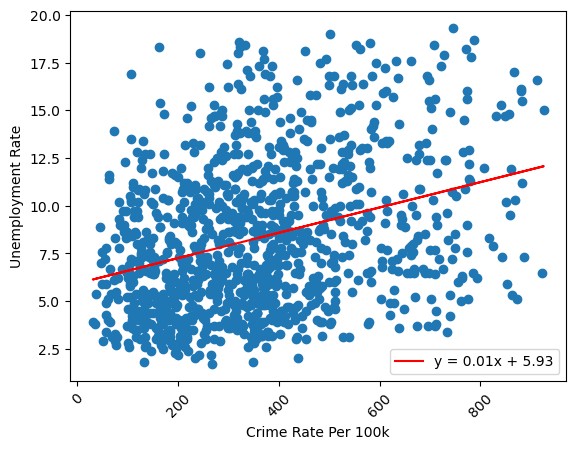

In [12]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Unemployment Rate')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Unemployment Rate']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Unemployment Rate")

Slope: -0.000464862129628114
Intercept: 1.783313826863587
R-squared: 0.018048186810228357
P-value: 8.326739095653699e-06
Standard Error: 0.00010381021526221997


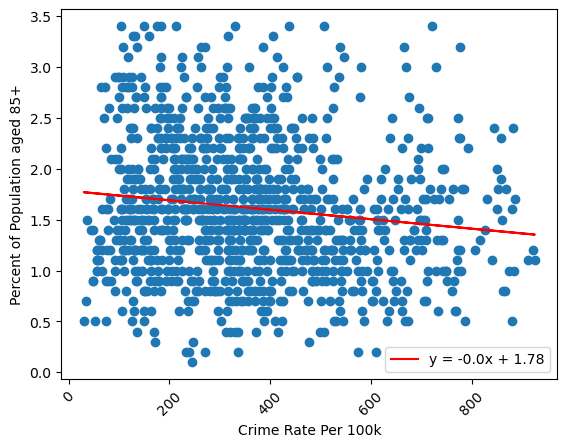

In [13]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 85 years and over')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 85 years and over']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 85+")

Slope: -0.0007469887923866332
Intercept: 3.845651034821112
R-squared: 0.01842570491824236
P-value: 7.020356066375468e-06
Standard Error: 0.00016544311775224123


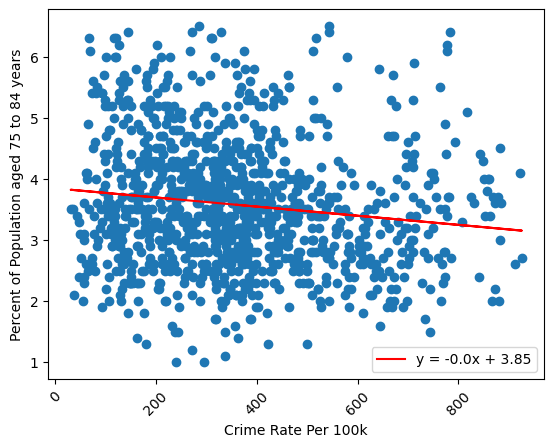

In [14]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 75 to 84 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 75 to 84 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 75 to 84 years")

Slope: -0.0007321775006488992
Intercept: 7.105785090265367
R-squared: 0.00669214314011574
P-value: 0.006536274663671805
Standard Error: 0.0002687106666667218


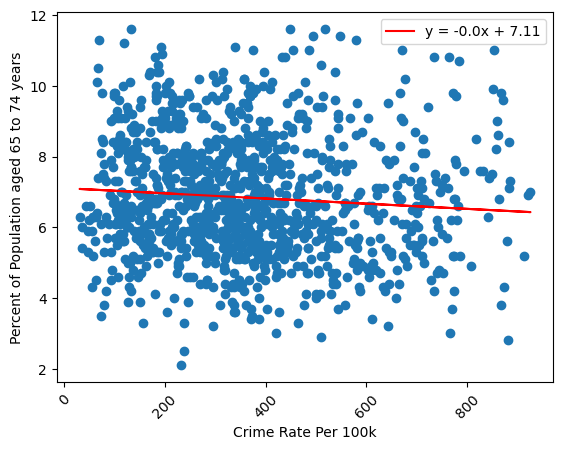

In [15]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 65 to 74 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 65 to 74 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 65 to 74 years")

Slope: -0.0004607385030865445
Intercept: 5.265100736228571
R-squared: 0.007134178771009586
P-value: 0.005181811333132148
Standard Error: 0.0001644812789241448


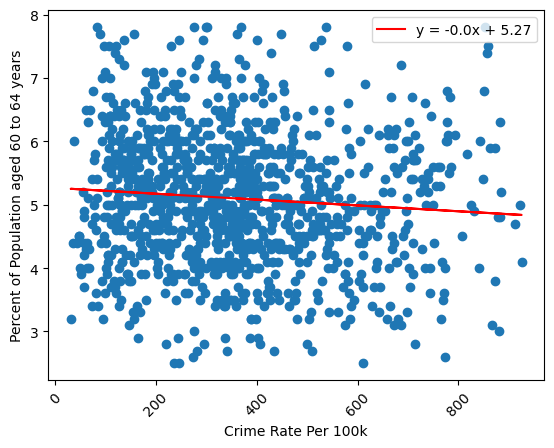

In [16]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 60 to 64 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 60 to 64 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 60 to 64 years")

Slope: -0.00139154643799347
Intercept: 6.462445611837346
R-squared: 0.06344129356933048
P-value: 1.5965533243880014e-17
Standard Error: 0.00016062358384501024


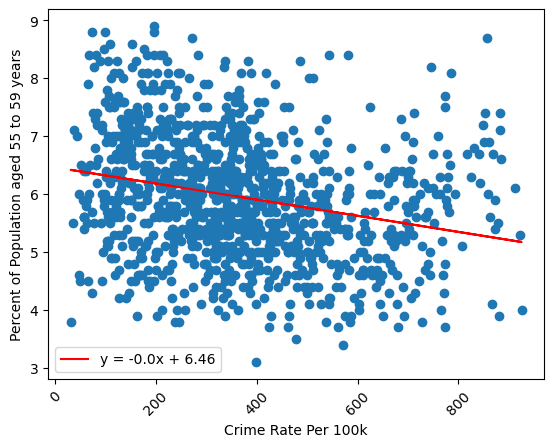

In [17]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 55 to 59 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 55 to 59 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 55 to 59 years")

Slope: -0.00344021175554222
Intercept: 14.517242011276132
R-squared: 0.14909355371643804
P-value: 2.746135843970402e-40
Standard Error: 0.0002484780259975287


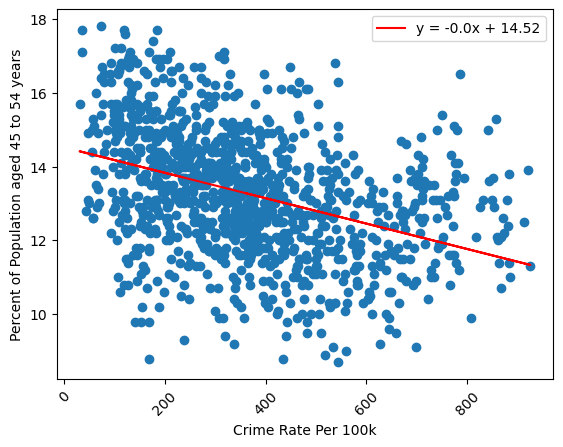

In [18]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 45 to 54 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 45 to 54 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 45 to 54 years")

Slope: -0.0016658332464047556
Intercept: 14.254939183618749
R-squared: 0.039930575817966135
P-value: 2.5718562690151536e-11
Standard Error: 0.000247183079815904


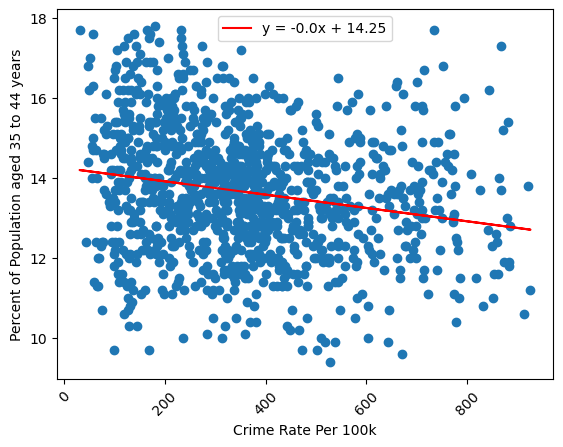

In [19]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 35 to 44 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 35 to 44 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 35 to 44 years")

Slope: 0.002432654385331568
Intercept: 14.077678148360084
R-squared: 0.04600405585365772
P-value: 1.2141351617799538e-12
Standard Error: 0.0003383437996773253


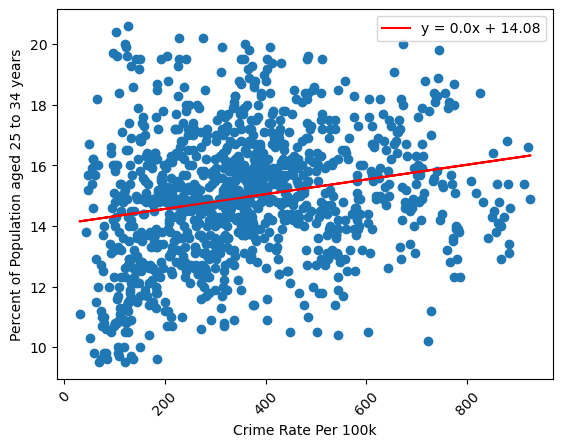

In [20]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 25 to 34 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 25 to 34 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 25 to 34 years")

Slope: 0.0021773056249979623
Intercept: 6.400926335162264
R-squared: 0.08189531234615727
P-value: 8.028801795438736e-22
Standard Error: 0.00022193472163065496


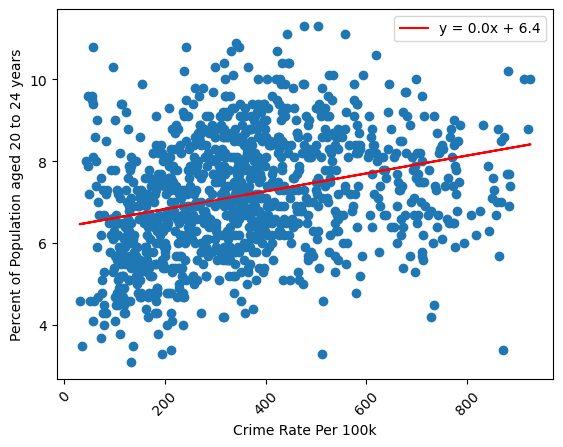

In [21]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 20 to 24 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 20 to 24 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 20 to 24 years")

Slope: 0.000776382114121523
Intercept: 6.5877561334690995
R-squared: 0.009752138996839332
P-value: 0.0010233099517565323
Standard Error: 0.00023577832466354382


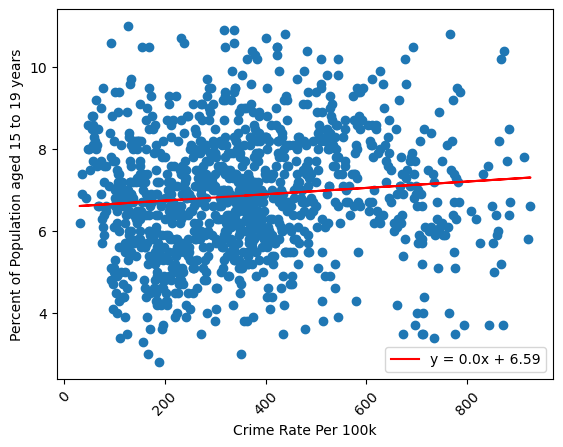

In [22]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 15 to 19 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 15 to 19 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 15 to 19 years")

Slope: 0.0005541968223846999
Intercept: 6.593594459959591
R-squared: 0.004975613834947372
P-value: 0.018754656176553332
Standard Error: 0.0002354440285223608


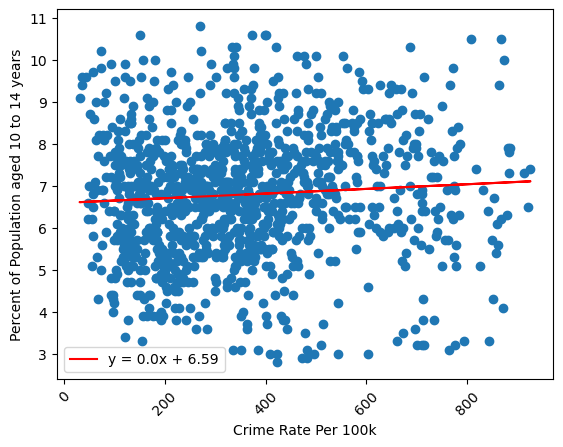

In [23]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 10 to 14 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 10 to 14 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 10 to 14 years")

Slope: 0.0012407945512378916
Intercept: 6.138719745059162
R-squared: 0.027184109904106173
P-value: 3.491850698172229e-08
Standard Error: 0.00022339482595020623


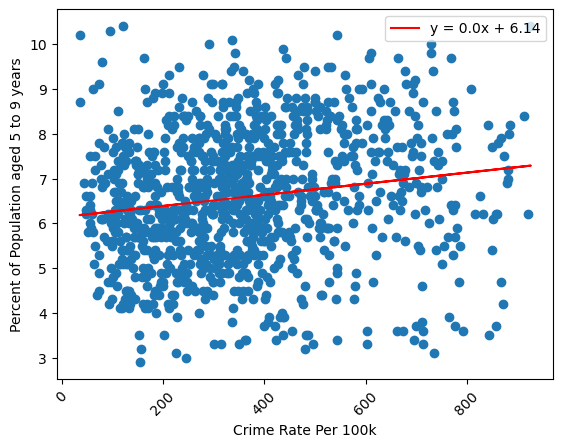

In [24]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent 5 to 9 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent 5 to 9 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent of Population aged 5 to 9 years")

Slope: 0.0018071574716312894
Intercept: 5.989247682714064
R-squared: 0.06499016327810783
P-value: 7.47776267949014e-18
Standard Error: 0.00020639183738562275


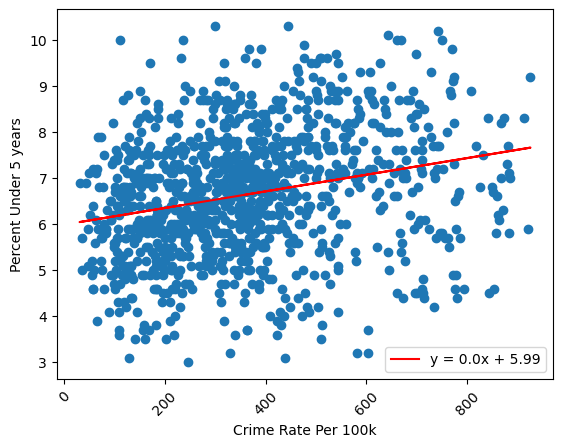

In [25]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent Under 5 years')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent Under 5 years']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Under 5 years")

Slope: -11.021610794125163
Intercept: 119404.65622333217
R-squared: 0.0023366269557821623
P-value: 0.12642575240633866
Standard Error: 7.20542578830206


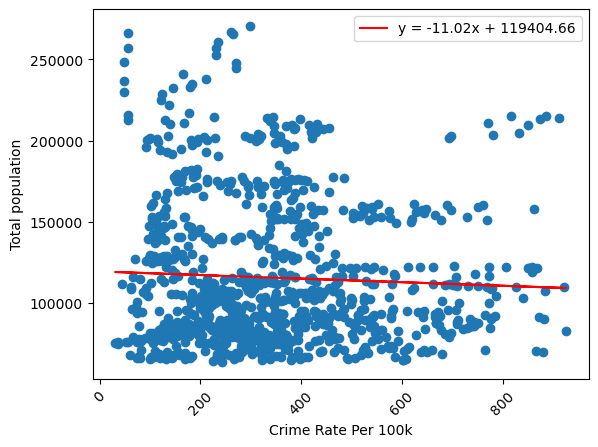

In [26]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Total population')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Total population']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Total population")

Slope: -0.010235074405838531
Intercept: 12.8836976539511
R-squared: 0.13839766676799467
P-value: 5.019249479223072e-35
Standard Error: 0.0007980499502029335


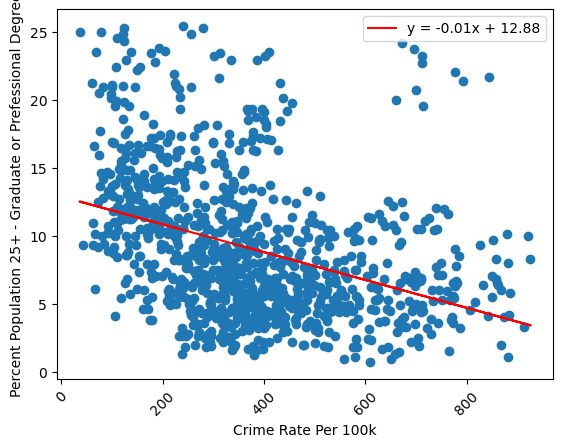

In [27]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, 'Percent Population 25 years and over - Graduate or Prefessional Degree')

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df['Percent Population 25 years and over - Graduate or Prefessional Degree']

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - Graduate or Prefessional Degree")

Slope: -0.019941244650005074
Intercept: 26.471437342437547
R-squared: 0.22512784770172897
P-value: 1.0046060833356176e-63
Standard Error: 0.0011084346238076591


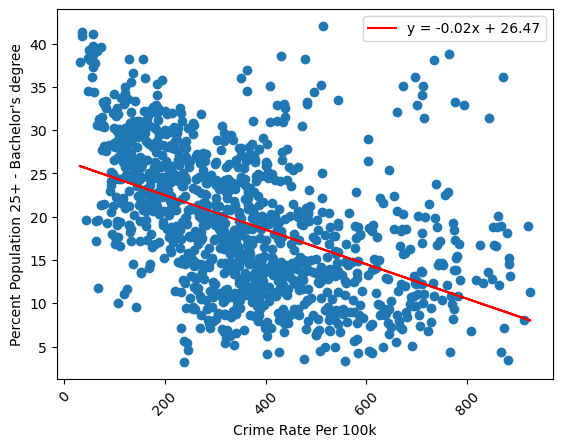

In [28]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - Bachelor's degree")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - Bachelor's degree"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - Bachelor's degree")

Slope: -0.0014773938064192554
Intercept: 8.565558240785512
R-squared: 0.018939048743816484
P-value: 4.316680103026265e-06
Standard Error: 0.0003198777622036231


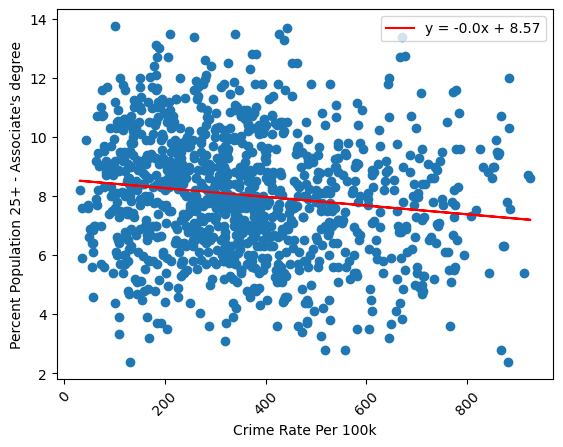

In [29]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - Associate's degree")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - Associate's degree"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - Associate's degree")

Slope: 0.003253671546948927
Intercept: 20.997763840196722
R-squared: 0.016211959225829416
P-value: 2.0760367267399775e-05
Standard Error: 0.0007610986549131794


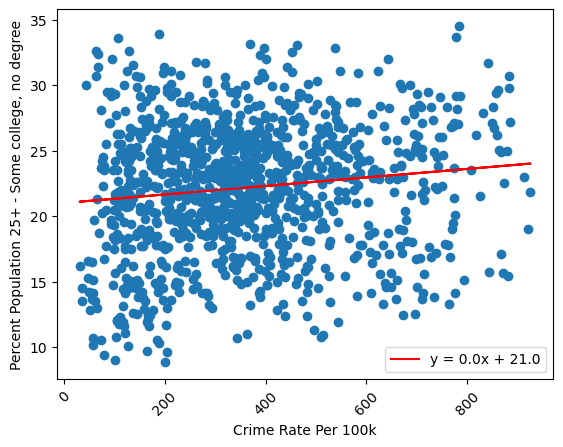

In [30]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - Some college, no degree")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - Some college, no degree"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - Some college, no degree")

Slope: 0.010311117474532675
Intercept: 18.094458505010532
R-squared: 0.1103757484953935
P-value: 6.198279830558898e-30
Standard Error: 0.0008806251241128935


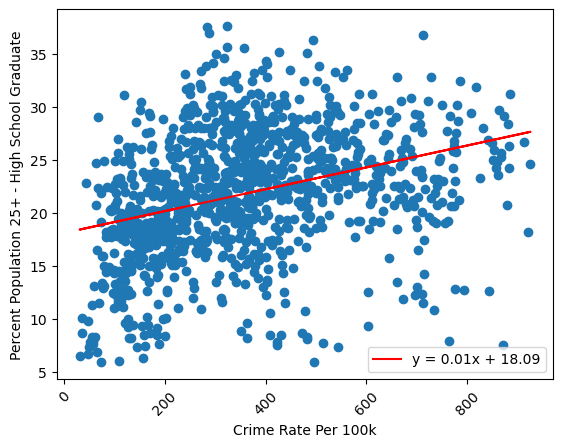

In [31]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - High School Graduate (and equivalent)")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - High School Graduate (and equivalent)"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - High School Graduate")

Slope: 0.008842972402761252
Intercept: 4.853387111032084
R-squared: 0.19647974472154028
P-value: 2.177977741183107e-54
Standard Error: 0.0005384557702517715


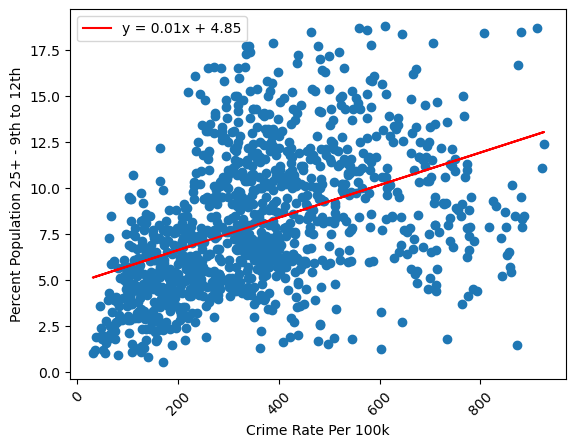

In [32]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - 9th to12th (No Diploma)")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - 9th to12th (No Diploma)"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - 9th to 12th")

Slope: 0.009490395216817374
Intercept: 5.195031305604932
R-squared: 0.1418456401317577
P-value: 6.830445733558251e-37
Standard Error: 0.0007193575792857643


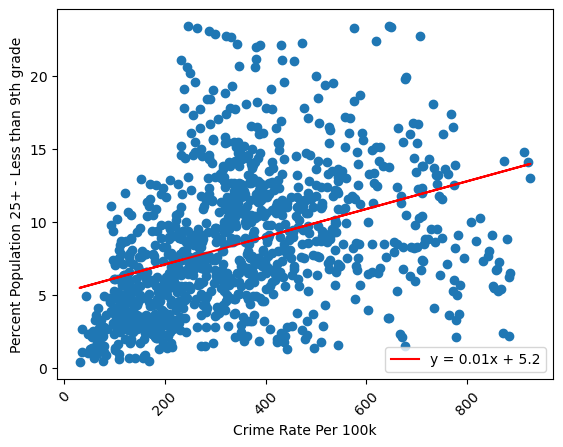

In [33]:
no_outliers_df = remove_outliers(crime, 'Crime_Rate_per_100k')
no_outliers_df = remove_outliers(no_outliers_df, "Percent Population 25 years and over - Less than 9th grade")

x_data = no_outliers_df['Crime_Rate_per_100k']
y_data = no_outliers_df["Percent Population 25 years and over - Less than 9th grade"]

plot_linear_regression(x_data,y_data, "Crime Rate Per 100k","Percent Population 25+ - Less than 9th grade")